In [1]:
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from shapely.geometry import LineString, Polygon, Point, box, shape
from shapely.algorithms.polylabel import polylabel
from descartes import PolygonPatch

from ipywidgets import interact, interactive, fixed

%matplotlib inline

/Users/sth/dev/rust-polylabel/venv/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
initial_polygon = Polygon([
    (0.0, 0.0),
    (4.0, 0.0),
    (4.0, 1.0),
    (1.0, 1.0),
    (1.0, 4.0),
    (0.0, 4.0),
    (0.0, 0.0)
])

In [7]:
quad_polygons = [
    box(0, 0, 4, 4),
    box(0, 0, 2, 2),
    box(2, 0, 4, 2),
    box(0, 2, 2, 4),
    box(2, 2, 4, 4),
    box(0, 0, 1, 1),
    box(1, 0, 2, 1),
    box(0, 1, 1, 2),
    box(1, 1, 2, 2),
    box(0, 2, 1, 3),
    box(1, 2, 2, 3),
    box(0, 3, 1, 4),
    box(1, 3, 2, 4),
    box(2, 0, 3, 1),
    box(3, 0, 4, 1),
    box(2, 1, 3, 2),
    box(3, 1, 4, 2),
    box(0, 1, 0.5, 1.5),
    box(0.5, 1, 1, 1.5),
    box(0, 1.5, 0.5, 2),
    box(0.5, 1.5, 1, 2),
    box(0, 2, 0.5, 2.5),
    box(0.5, 2, 1, 2.5),
    box(0, 2.5, 0.5, 3),
    box(0.5, 2.5, 1, 3),
    box(1, 0, 1.5, 0.5),
    box(1.5, 0, 2, 0.5),
    box(1, 0.5, 1.5, 1),
    box(1.5, 0.5, 2, 1),
    box(2, 0, 2.5, 0.5),
    box(2.5, 0, 3, 0.5),
    box(2, 0.5, 2.5, 1),
    box(2.5, 0.5, 3, 1),
    box(3, 0, 3.5, 0.5),
    box(3.5, 0, 4, 0.5),
    box(3, 0.5, 3.5, 1),
    box(3.5, 0.5, 4, 1),
    box(0, 0, 0.5, 0.5),
    box(0.5, 0, 1, 0.5),
    box(0, 0.5, 0.5, 1),
    box(0.5, 0.5, 1, 1),
    box(0, 3, 0.5, 3.5),
    box(0.5, 3, 1, 3.5),
    box(0, 3.5, 0.5, 4),
    box(0.5, 3.5, 1, 4),
    box(0.5, 0.5, 0.75, 0.75),
    box(0.75, 0.5, 1, 0.75),
    box(0.5, 0.75, 0.75, 1),
    box(0.75, 0.75, 1, 1),
    box(0.5, 0.5, 0.625, 0.625),
    box(0.625, 0.5, 0.75, 0.625),
    box(0.5, 0.625, 0.625, 0.75),
    box(0.625, 0.625, 0.75, 0.75),
]

In [12]:
save_args = {
    "format": "png",
    "bbox_inches": 'tight',
    "pad_inches": 0,
    "alpha": True,
    "transparent": True,
    "dpi": 300
}

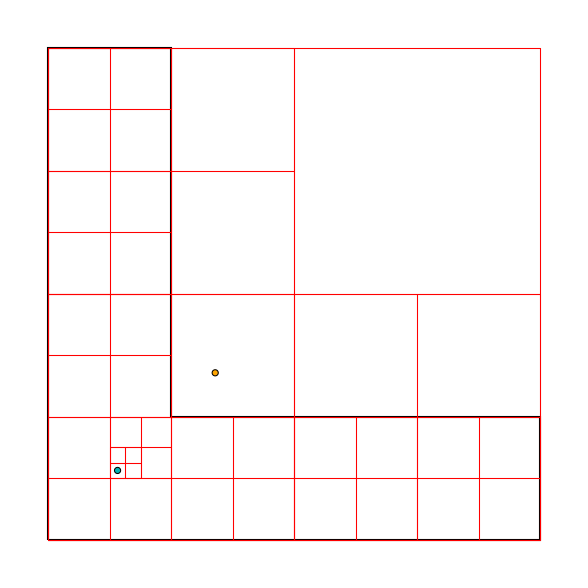

In [13]:
ppatches = [PolygonPatch(poly, fc='None', ec='#ff0000', alpha=1.0, zorder=3, lw=0.25) for poly in quad_polygons]

fig = plt.figure(1, figsize=(5., 5.), dpi=300)
ax = fig.add_subplot(121)
ax.set_aspect('equal')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')
ax.set_xlim(-0.15, 4.15)
ax.set_ylim(-0.15, 4.15)

# add initial polygon
ax.add_patch(PolygonPatch(initial_polygon, fc='None', ec='#000000', lw=0.5, alpha=1.0, zorder=2))
# add centroid as dot patch
ax.add_patch(PolygonPatch(Point(1.3571, 1.3571).buffer(.025), lw=0.25, fc='#ffa500', ec='#000000', zorder=4))
plt.savefig("data/polylabel_000.png", **save_args)

j = 0
for i, poly in enumerate(quad_polygons):
    j += 1
    ax.add_patch(ppatches[i])
    plt.savefig("data/polylabel_{:03d}.png".format(i + 1), **save_args)

# add pole of inaccessibility as patch
ax.add_patch(PolygonPatch(Point(0.5625, 0.5625).buffer(.025), lw=0.25, fc='#00b3b3', ec='#000000', zorder=4))

# save final plot
plt.savefig("data/polylabel_{:03d}.png".format(j + 1), **save_args)
plt.show()

In [ ]:
%%bash
convert -background white -alpha remove -layers OptimizePlus -set delay 20 -colors 512 -loop 0 -scale 100% data/*.png output.gif